In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline
pd.options.display.max_columns = 40

plt.style.use('seaborn')

# Load bank marketing data
df = pd.read_csv('./data/bank-additional-full.csv', sep=';')
df['outcome'] = (df['y'] == 'yes').astype(int)

# Load diamonds data
df_diamonds = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


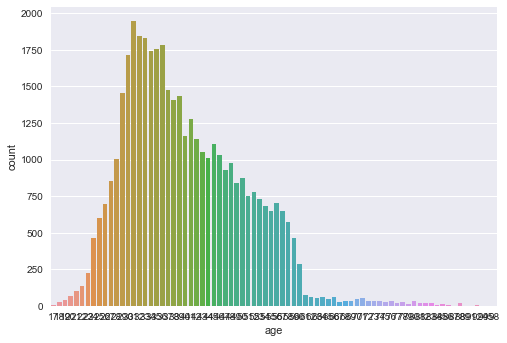

In [7]:
sns.countplot(x='age', data=df)

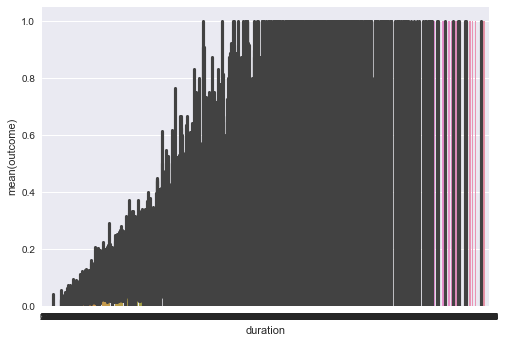

In [14]:
sns.barplot(x='duration', y='outcome', data=df)

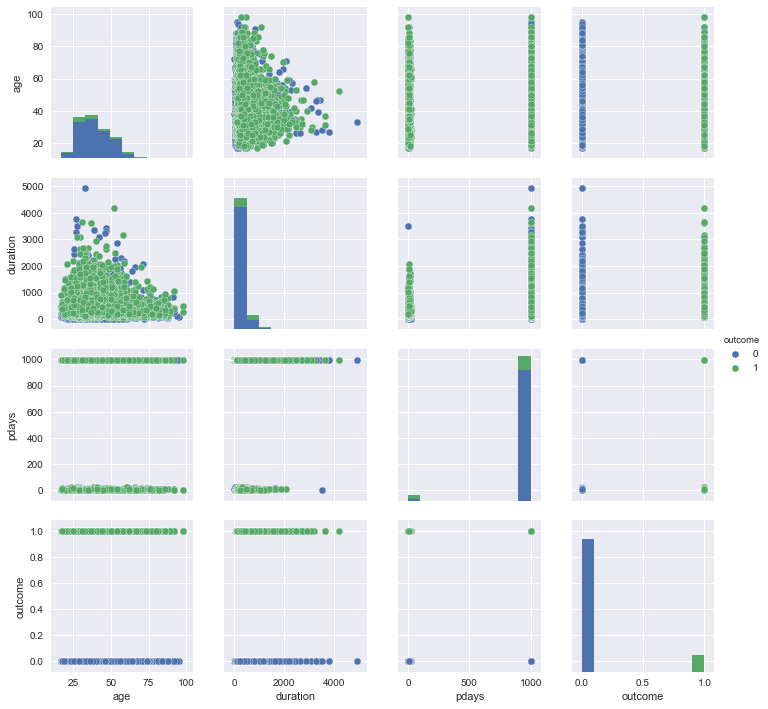

In [4]:
sns.pairplot(data=df[['age', 'duration', 'pdays', 'outcome']], hue='outcome')

In [11]:
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


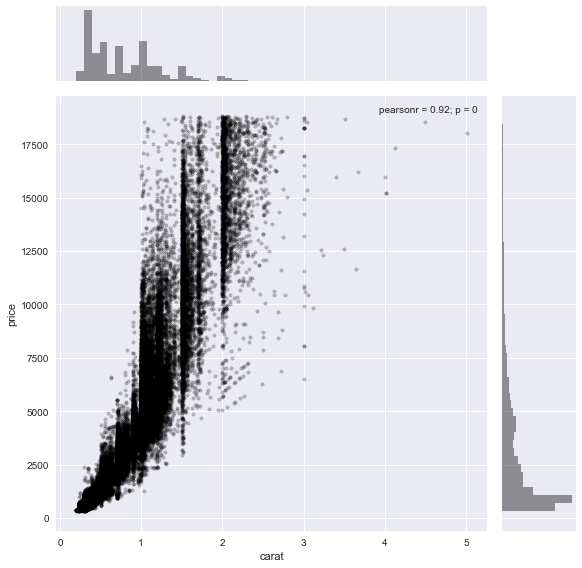

In [13]:
sns.jointplot(x='carat', y='price', data=df_diamonds, size=8, alpha=.25,
              color='k', marker='.')

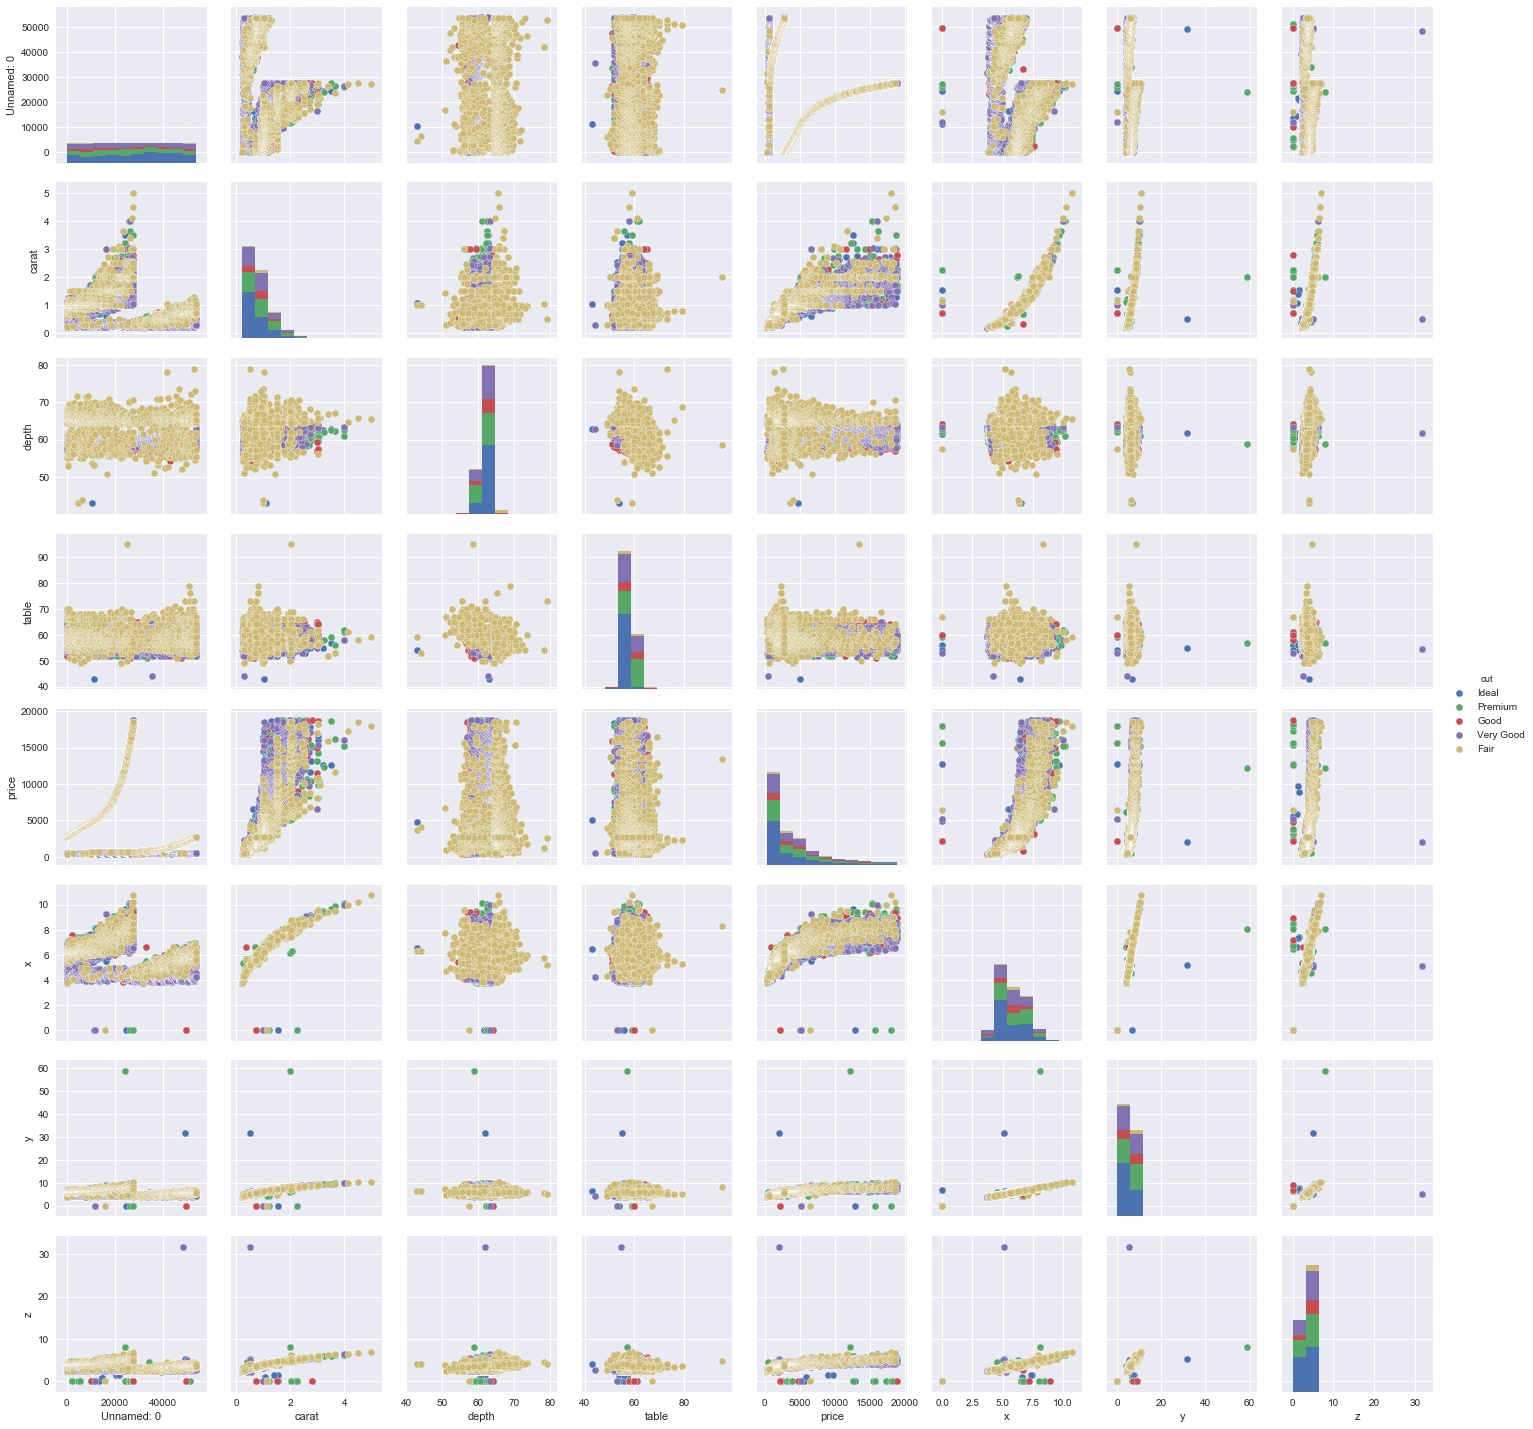

In [15]:
g = sns.pairplot(df_diamonds, hue='cut')

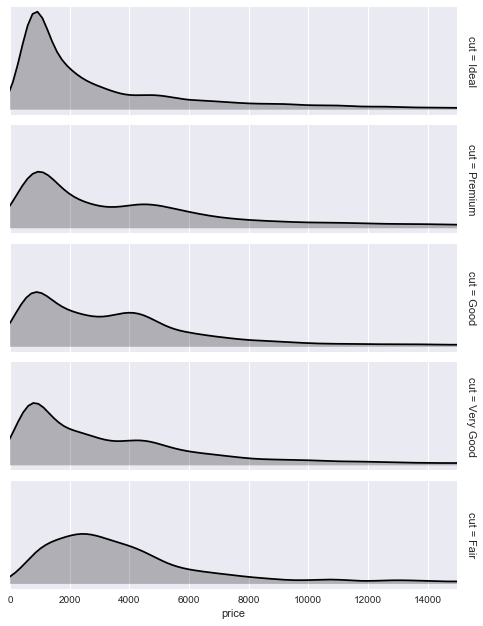

In [17]:
g = sns.FacetGrid(df_diamonds, row='cut', aspect=4, size=1.76, margin_titles=True)
g.map(sns.kdeplot, 'price', shade=True, color='k')
for ax in g.axes.flat:
    ax.yaxis.set_visible(False)
sns.despine(left=True)
g.fig.subplots_adjust(hspace=0.1)
g.set(xlim=(0, 15000))

In [21]:
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
agged.head()

,cut,color,Unnamed: 0,carat,depth,table,price,x,y,z
0,Fair,D,22993.699387,0.920123,64.048466,58.969325,4291.061350,6.018344,5.963190,3.839877
1,Fair,E,24044.593750,0.856607,63.319643,59.364732,3682.312500,5.909063,5.858214,3.722143
2,Fair,F,24414.756410,0.904712,63.508013,59.453205,3827.003205,5.990513,5.931122,3.787821
3,Fair,G,26670.949045,1.023822,64.339809,58.773248,4239.254777,6.173822,6.114076,3.963153
4,Fair,H,22296.056106,1.219175,64.585149,58.696370,5135.683168,6.579373,6.497393,4.219373


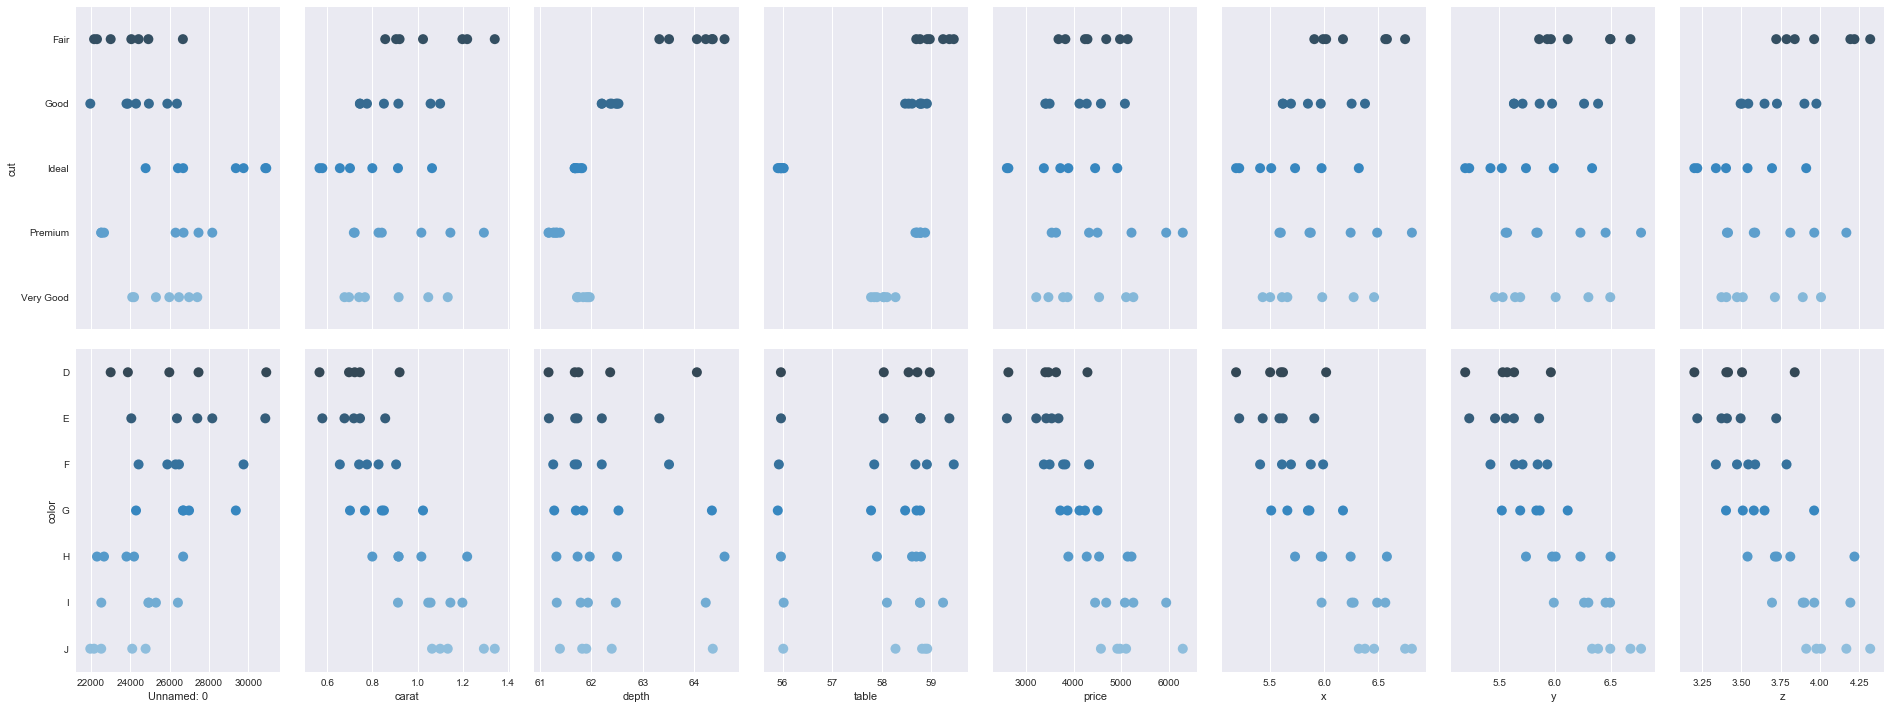

In [18]:
agged = df_diamonds.groupby(['cut', 'color']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['cut', 'color'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d')

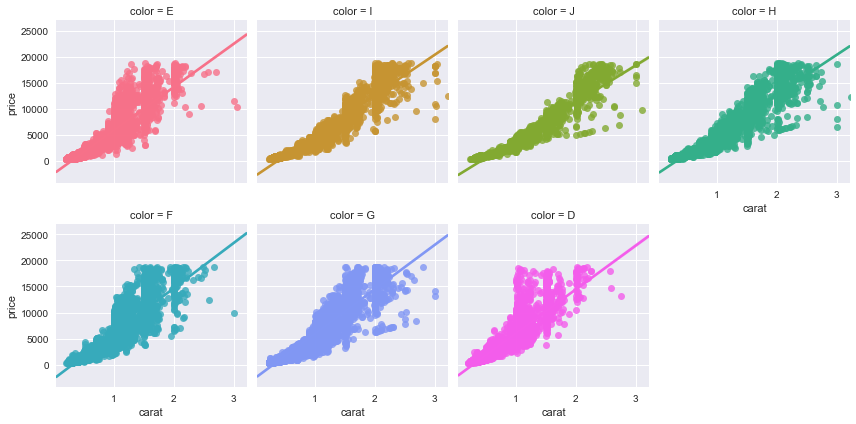

In [22]:
g = sns.FacetGrid(df_diamonds, col='color', hue='color', col_wrap=4)
g.map(sns.regplot, 'carat', 'price')

In [23]:
### Visualising machine learning model results

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/davidtan/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
df = sns.load_dataset('titanic')

clf = RandomForestClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = df['survived']
X = df.drop(['survived', 'who', 'alive'], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())
est.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'min_samples_split': [2, 5, 10], 'max_depth': [1, 2, 5, 10, 20, 30, 40], 'min_samples_leaf': [2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
scores = est.grid_scores_
rows = []
params = sorted(scores[0].parameters)
for row in scores:
    mean = row.mean_validation_score
    std = row.cv_validation_scores.std()
    rows.append([mean, std] + [row.parameters[k] for k in params])
scores = pd.DataFrame(rows, columns=['mean_', 'std_'] + params)

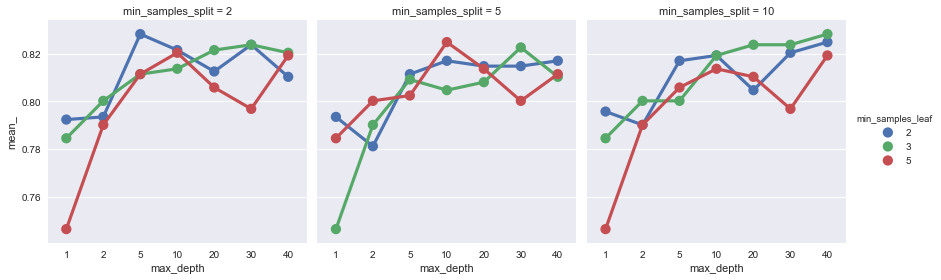

In [27]:
sns.factorplot(x='max_depth', y='mean_', data=scores, col='min_samples_split',
               hue='min_samples_leaf')